In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.impute import KNNImputer

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest, RandomForestClassifier 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,  RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

The features: \
**customer_id :** id of the credit card holder\
**balance_account :** balance amount left in the account to make purchases at the end of the 6-month period\
**purchases_amount :** amount of purchases made from account\
**paid_advance :** number of transactions made with “Cash in Advance” method\
**full_purchases :** maximum purchase amount done in full payment\
**balance_frequency_update :** how frequently the balance has been updated, score between 0 and 1 (1 = frequently - updated, 0 = not frequently updated)\
**installments :** amount of purchases done in installments\
**purchases_frequency :** how frequently the purchases are being made, score between 0 and 1 (1 = frequently - - purchased, 0 = not frequently purchased)\
**full_purchases_frequency :** how frequently purchases are happening in full payment (1 = frequently purchased, - 0 = not frequently purchased)\
**purchases_installments_frequency :** how frequently purchases in installments are being done (1 = frequently - done, 0 = not frequently done)\
**cash_advance_frequency :** how frequently the cash in advance being paid\
**nr_cash_advances :** cash in advance given by the user\
**nr_purchases :** number of purchase transactions made\
**credit_limit :** limit of credit card for user\
**fixed_rate_period :** duration of fixed interest rate of credit card service for user (in months)\
**payments :** amount of payment done by user\
**min_payments :** minimum amount of payments made by user\
**full_payment_prc :** percent of full payment paid by user

In [2]:
model_accuracy = {}

def model_evaluation(model_name, predictions):
    
    print(classification_report(y_test, predictions))
    print('----------------------------------------------------------')
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100))
    print('----------------------------------------------------------')
    
    model_accuracy[model_name] = accuracy

In [3]:
path = "../data/card_transactions.csv"
df = pd.read_csv(path, na_values=["?", ""])
df

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.60,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.30,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.00,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.00,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,zdVfd3CYHYBjf61b,1127.607606,0.00,271.093275,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.083333,1,0,8500.0,12,662.387331,260.277533,0.000000
8496,JGghMowcxhfbVGKm,21.409828,149.71,0.000000,0.00,1.000000,149.71,0.916667,0.000000,0.916667,0.000000,0,11,1500.0,12,141.974905,150.500248,0.166667
8497,5GrEtC6ncxuLpnXZ,0.000000,0.00,253.887233,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,1,0,500.0,9,2437.932505,NaN,0.000000
8498,Ox7ETtYHjE2uo4Xo,1646.384530,1047.34,146.650389,1047.34,1.000000,0.00,0.583333,0.583333,0.000000,0.166667,2,51,3000.0,12,462.848132,497.408854,0.000000


In [4]:
df.info()  # there is missin data in credit_limit and min_payments

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

In [5]:
df.set_index("customer_id", inplace=True)

In [6]:
# impute missing numerical values with knn
num_cols = df.columns
knn_imp = KNNImputer(n_neighbors=5)
df = pd.DataFrame(knn_imp.fit_transform(df), columns=num_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance_account                   8500 non-null   float64
 1   purchases_amount                  8500 non-null   float64
 2   paid_advance                      8500 non-null   float64
 3   full_purchases                    8500 non-null   float64
 4   balance_frequency_update          8500 non-null   float64
 5   installments                      8500 non-null   float64
 6   purchases_frequency               8500 non-null   float64
 7   full_purchases_frequency          8500 non-null   float64
 8   purchases_installments_frequency  8500 non-null   float64
 9   cash_advance_frequency            8500 non-null   float64
 10  nr_cash_advances                  8500 non-null   float64
 11  nr_purchases                      8500 non-null   float64
 12  credit

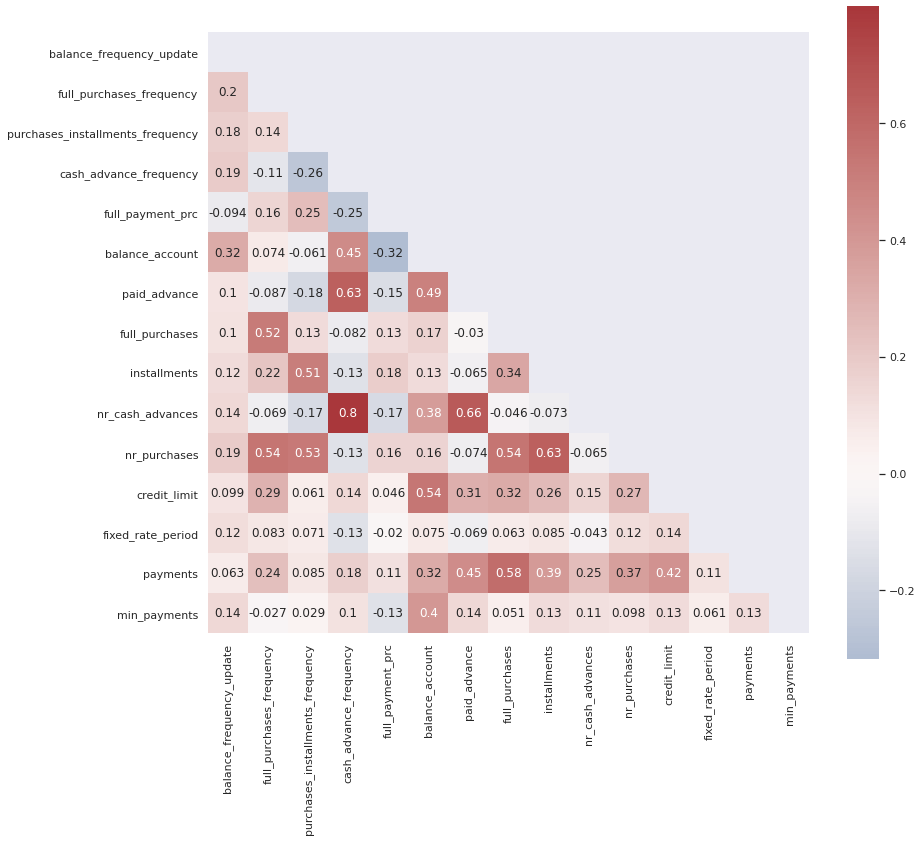

In [165]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr, mask=mask, square=True, cmap="vlag", center=0, annot=True)
plt.savefig('heatmap1.png')

In [8]:
# drop variables that are correlated higher than 0.85
corr_upper = np.triu(corr, k=1)
idx = corr[(abs(corr_upper) > 0.85).any(axis=1)].index
df.drop(idx, axis=1, inplace=True)
df.columns

Index(['balance_account', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'full_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'nr_cash_advances', 'nr_purchases', 'credit_limit', 'fixed_rate_period',
       'payments', 'min_payments', 'full_payment_prc'],
      dtype='object')

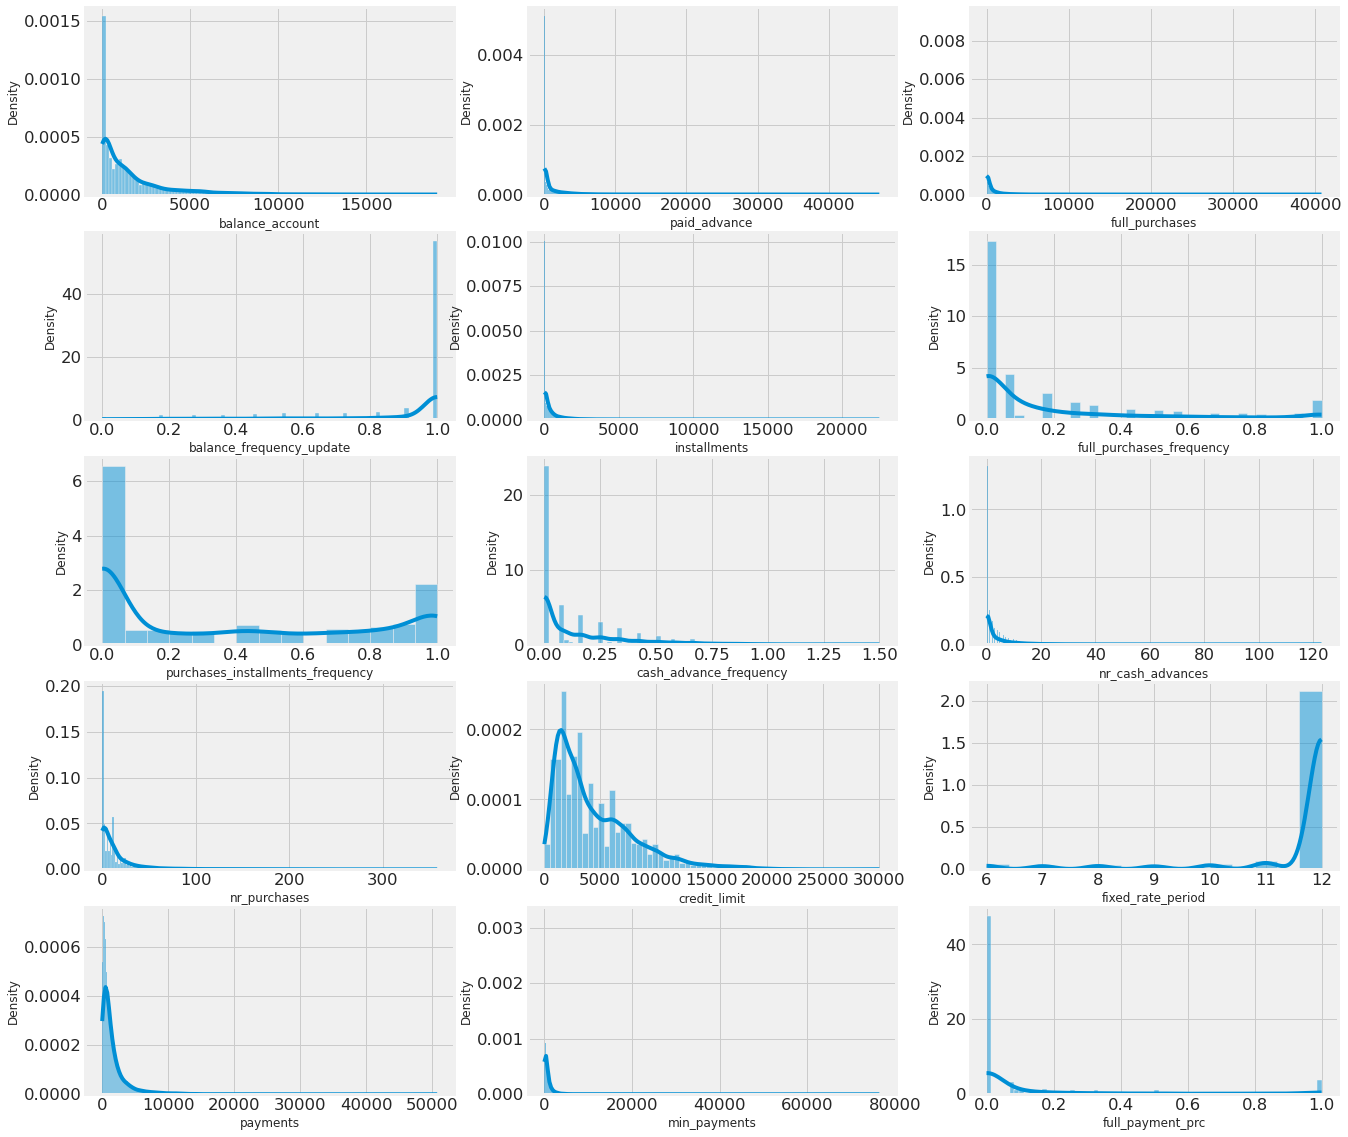

In [9]:
fig, axs = plt.subplots(5, 3, sharex=False, sharey=False, figsize=(20, 20))
for index, name in enumerate(df.columns):
    col = index % 3
    row = (index - col) // 3
    ax = axs[row][col]
    sns.histplot(ax=ax, data=df, x=name, kde=True, stat="density")

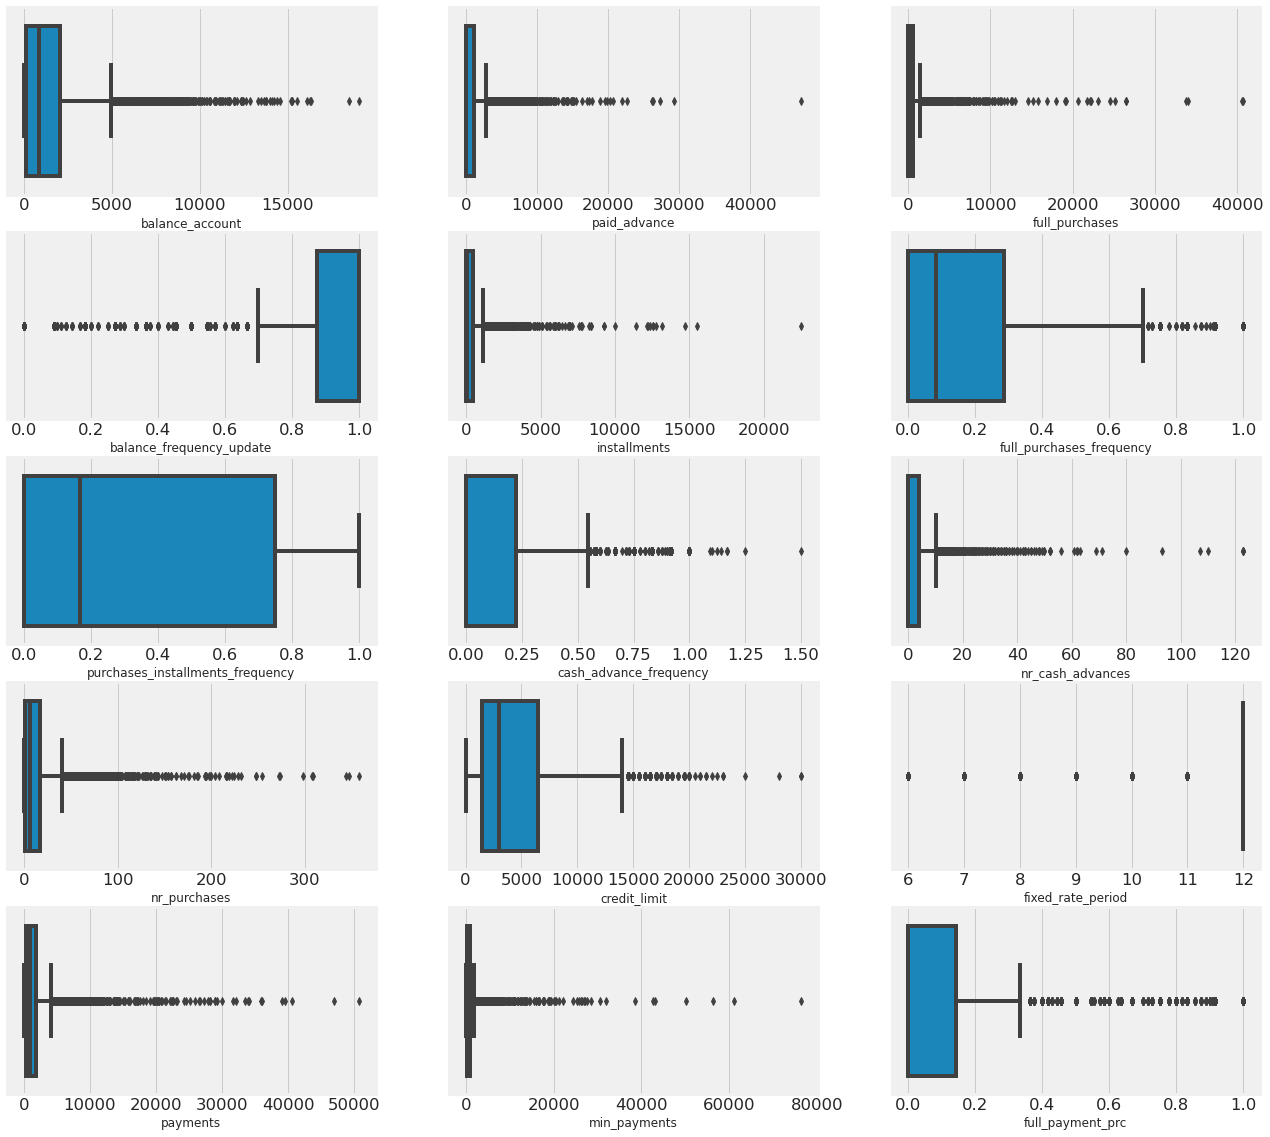

In [10]:
fig, axs = plt.subplots(5, 3, sharex=False, sharey=False, figsize=(20, 20))
for index, name in enumerate(df.columns):
    col = index % 3
    row = (index - col) // 3
    ax = axs[row][col]
    sns.boxplot(ax=ax, data=df, x=name)
plt.show()

In [11]:
columns_to_scale = [
    "balance_account",
    "paid_advance",
    "full_purchases",
    "installments",
    "nr_cash_advances",
    "nr_purchases",
    "credit_limit",
    "fixed_rate_period",
    "payments",
    "min_payments",
]

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

subset_df = df[columns_to_scale].copy()  # could not use timestamp

mms = MinMaxScaler(feature_range=(0, 1))
subset_df[columns_to_scale] = mms.fit_transform(subset_df)
subset_df.head()

,balance_account,paid_advance,full_purchases,installments,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments
0,0.000488,0.000000,0.000000,0.004782,0.00000,0.027933,0.031720,0.833333,0.001772,0.001174
1,0.002766,0.000000,0.000000,0.006680,0.00000,0.016760,0.031720,0.000000,0.001079,0.001085
2,0.071459,0.009819,0.000000,0.000000,0.04878,0.000000,0.048414,0.833333,0.005974,0.005808
3,0.106161,0.000000,0.008910,0.000000,0.00000,0.036313,0.065109,1.000000,0.013884,0.010416
4,0.001172,0.024652,0.002331,0.000000,0.02439,0.002793,0.081803,1.000000,0.080720,0.000525


In [13]:
df.drop(columns_to_scale, axis=1, inplace=True)

In [14]:
df = df.join(subset_df)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance_frequency_update          8500 non-null   float64
 1   full_purchases_frequency          8500 non-null   float64
 2   purchases_installments_frequency  8500 non-null   float64
 3   cash_advance_frequency            8500 non-null   float64
 4   full_payment_prc                  8500 non-null   float64
 5   balance_account                   8500 non-null   float64
 6   paid_advance                      8500 non-null   float64
 7   full_purchases                    8500 non-null   float64
 8   installments                      8500 non-null   float64
 9   nr_cash_advances                  8500 non-null   float64
 10  nr_purchases                      8500 non-null   float64
 11  credit_limit                      8500 non-null   float64
 12  fixed_

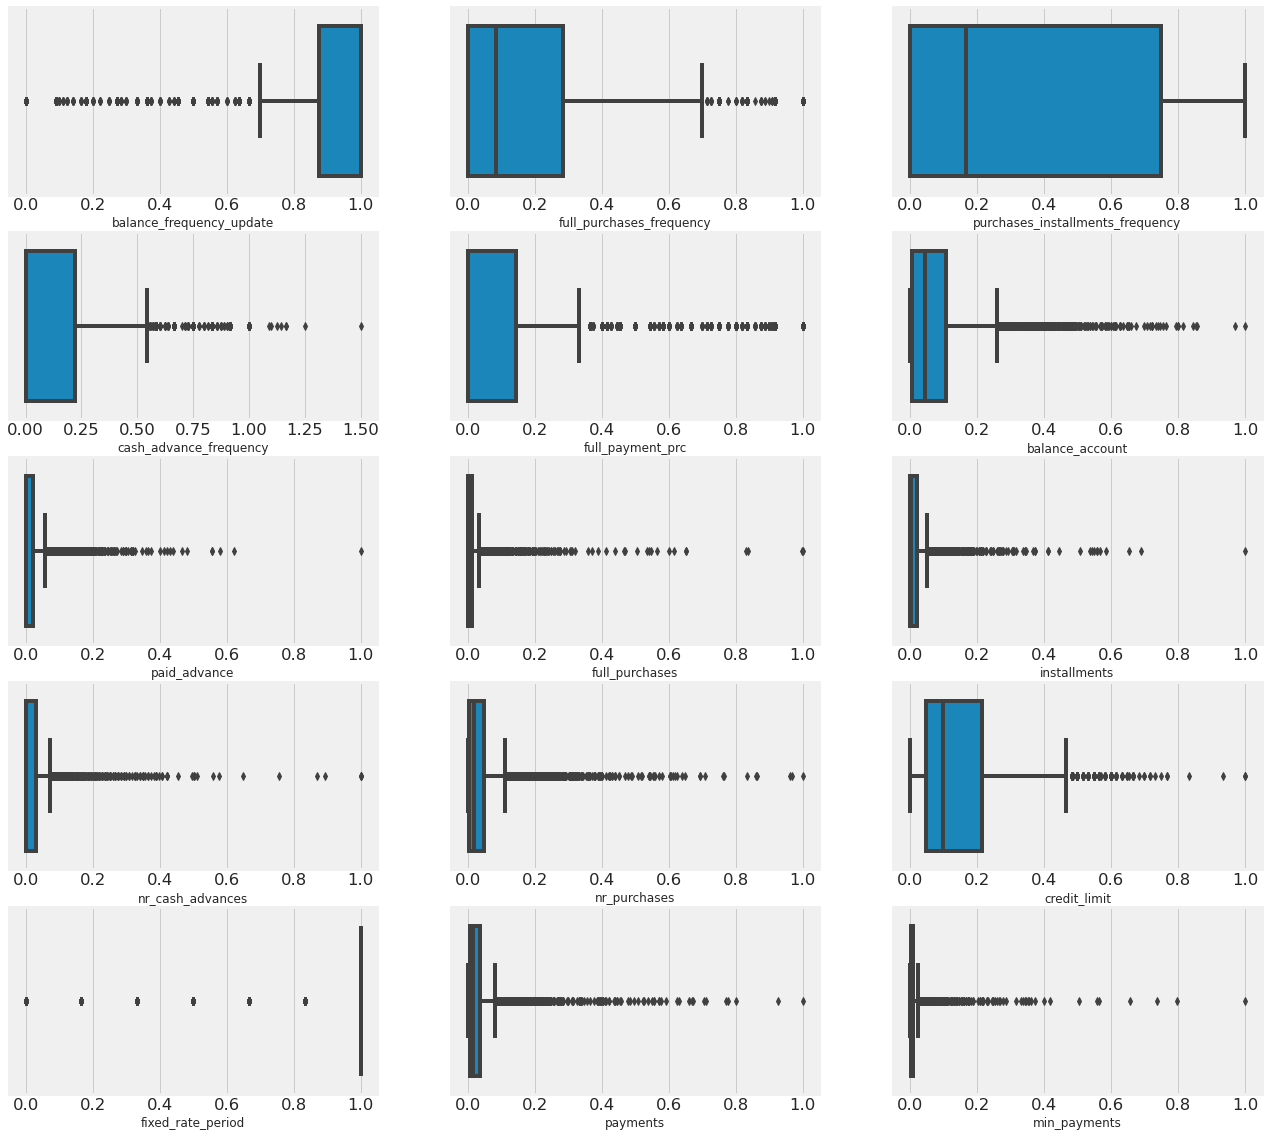

In [16]:
fig, axs = plt.subplots(5, 3, sharex=False, sharey=False, figsize=(20, 20))
for index, name in enumerate(df.columns):
    col = index % 3
    row = (index - col) // 3
    ax = axs[row][col]
    sns.boxplot(ax=ax, data=df, x=name)

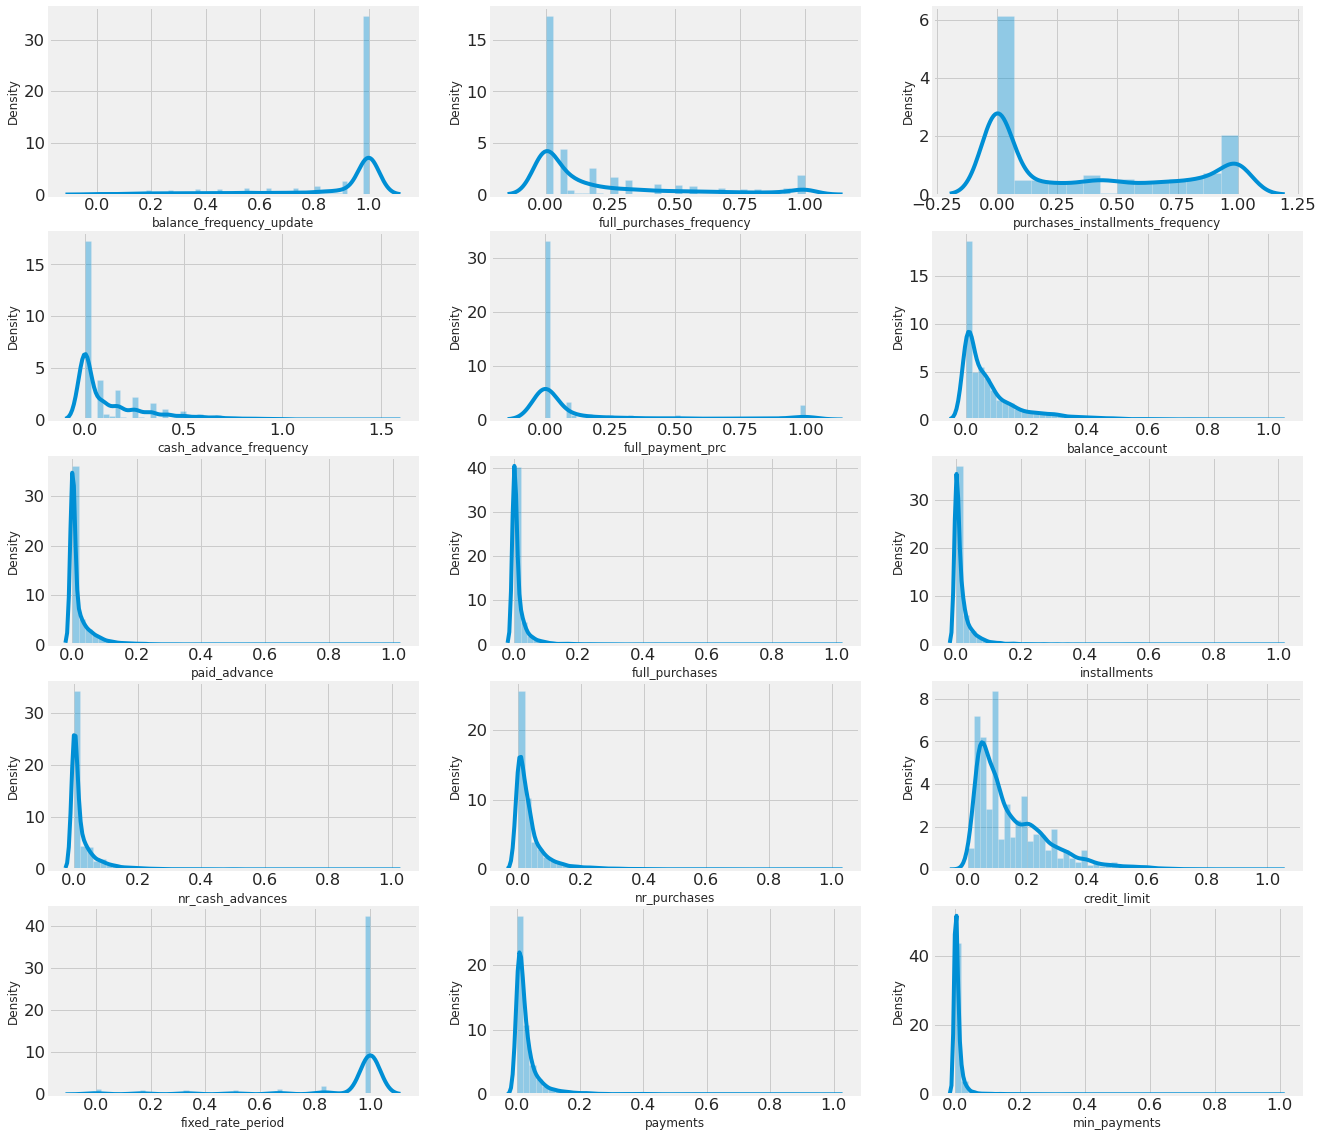

In [17]:
import warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
for i in range(5):
    for j in range(3):
        sns.distplot(df[df.columns[3 * i + j]], ax=axs[i,j])
plt.show()

# KMEANS 

In [18]:
#Determining Appropriate Number of Clusters (Elbow Curve)
from sklearn.cluster import KMeans

df2 = df.drop(columns='credit_limit')

cluster_range = range(2,25)
cluster_errors = []
for i in cluster_range:
    clusters = KMeans(i) 
    clusters.fit(df2) 
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,2,3049.194447
1,3,2567.729925
2,4,2213.932227
3,5,1936.435061
4,6,1712.603235
5,7,1543.343175
6,8,1416.296736
7,9,1295.572399
8,10,1196.356244
9,11,1129.206149


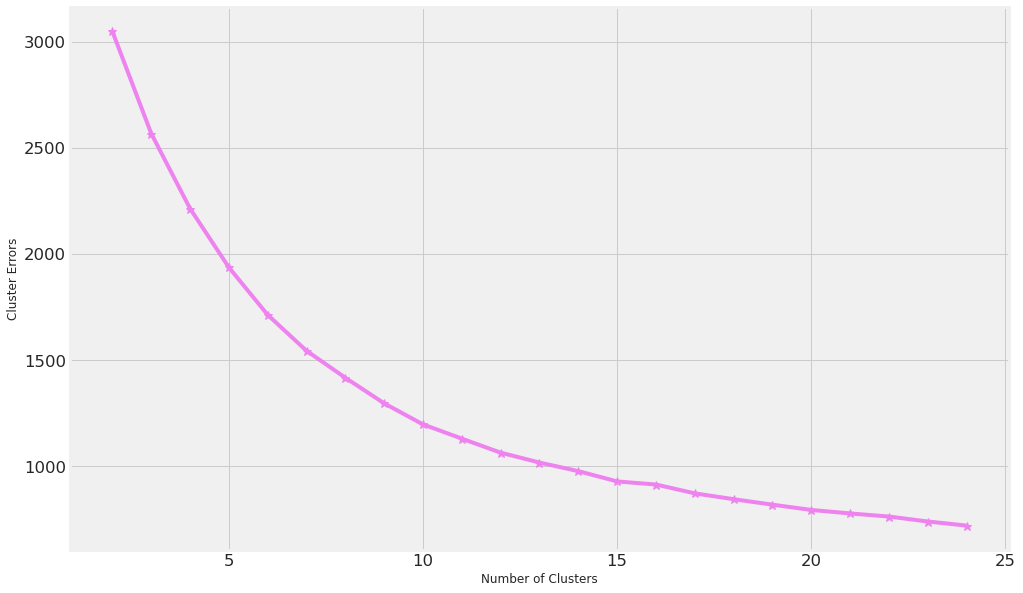

In [19]:
plt.figure(figsize=(15,10))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors, marker = '*',color='violet')# Scree Plot/Elbow Curve
plt.xlabel("Number of Clusters")
plt.ylabel("Cluster Errors")
plt.grid(True)
plt.show()

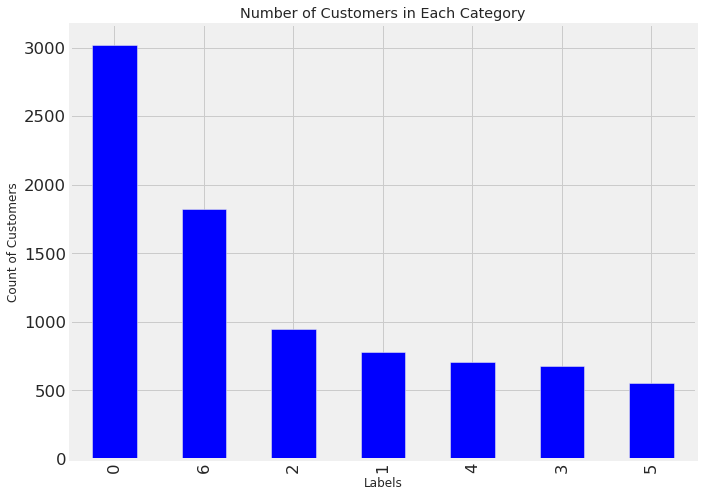

In [20]:
#kmeans

kmeans = KMeans(n_clusters=7, n_init=100, random_state=42)
kmeans.fit(df2)
df_labeled = pd.DataFrame(kmeans.labels_, columns = list(['labels']))
df_labeled['labels'] = df_labeled['labels'].astype('category')

plt.figure(figsize=(10,8))
df_labeled['labels'].value_counts().plot.bar(color='blue')
plt.xlabel("Labels")
plt.ylabel("Count of Customers")
plt.title("Number of Customers in Each Category")
plt.show()

In [21]:
# df = df.join(df_labeled)

In [22]:
# from sklearn.metrics import silhouette_score

# def evaluate_metrics(df, min_clust=2, max_clust=8, rand_state=42):
#     inertias = []
#     silhouette = []
#     for n_clust in range(min_clust, max_clust):
#         kmeans = KMeans(n_clusters=n_clust, random_state=rand_state)
#         y_label = kmeans.fit_predict(df)
#         inertias.append(kmeans.inertia_)
#         silhouette.append(silhouette_score(df, y_label))     

#     fig, ax = plt.subplots(1, 2, figsize=(15, 10))
#     ax[0].plot(range(min_clust, max_clust), inertias, '-x', linewidth=2)
#     ax[0].set_xlabel('No. of clusters')
#     ax[0].set_ylabel('Inertia')
    
#     ax[1].plot(range(min_clust, max_clust), silhouette, '-x', linewidth=2)
#     ax[1].set_xlabel('No. of clusters')
#     ax[1].set_ylabel('Silhouette Score')
    
#     fig.suptitle('Metrics to evaluate the number of clusters')
#     plt.show()
    
# evaluate_metrics(df.iloc[:, :-2])

In [23]:
#PCA
#df2 
#according to the previous data we chose k=7

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(df2)
x = pca_features[:,0]
y = pca_features[:,1]

k=7
kmeans = KMeans(n_clusters=k, random_state=42)

cl_labels = kmeans.fit_predict(df2)
df_pca_features = pd.DataFrame({'cluster_id': cl_labels, 
                                'pc_1':x, 
                                'pc_2':y})

In [24]:
# segm_kmeans= df2.copy()
# df2['Segment K-means'] = kmeans.labels_

In [25]:
# df_segm_analysis = df2.groupby(['Segment K-means']).mean()
# col = df_segm_analysis.columns.values

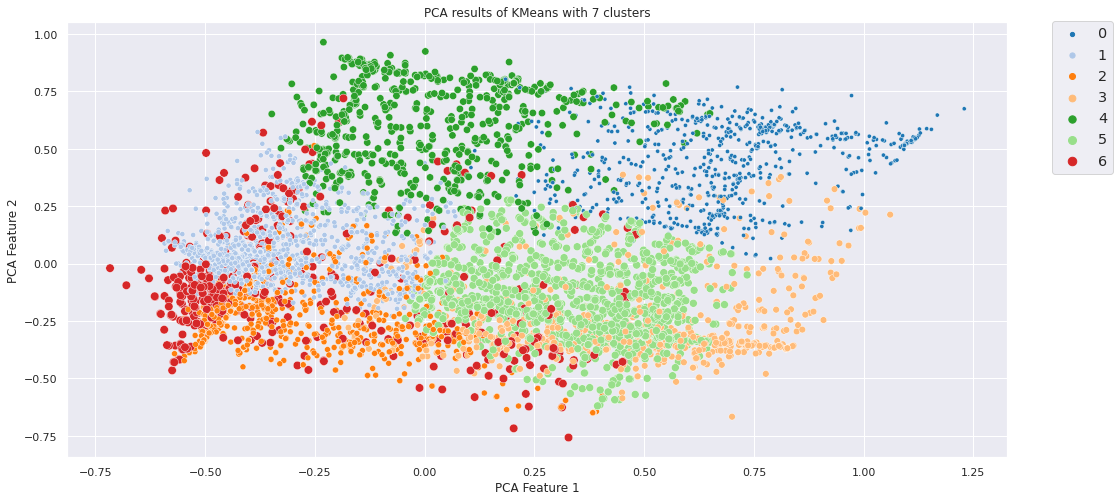

In [26]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.scatterplot(x='pc_1', y='pc_2', 
                hue='cluster_id', 
                size='cluster_id', 
                data=df_pca_features, 
                palette='tab20', 
                legend='full')
ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_title('PCA results of KMeans with ' + str(k) + ' clusters')
ax.legend(bbox_to_anchor=(1.04,1.02), loc='upper left', fontsize='large');

In [27]:
pca.explained_variance_ratio_

array([0.36017651, 0.17716251])

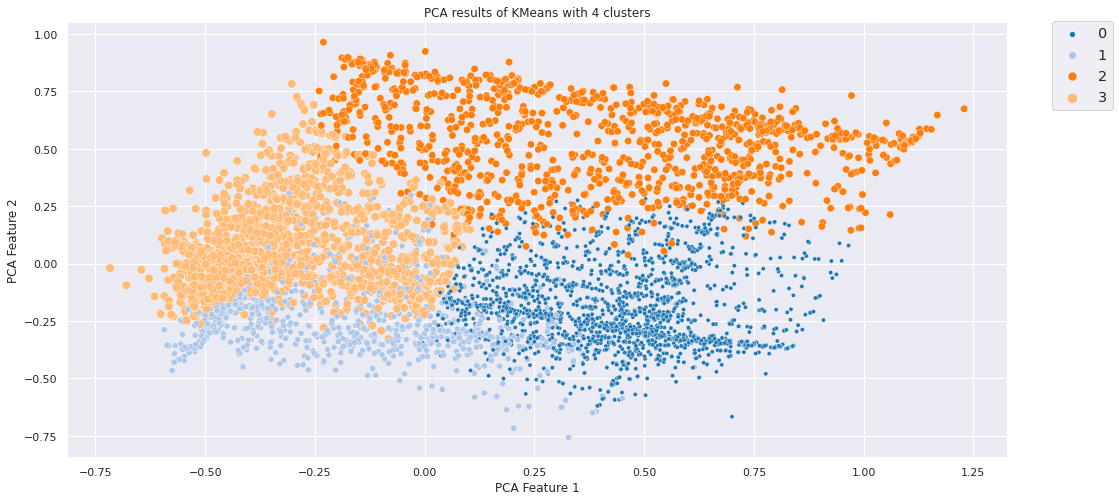

In [28]:
#do EDA and check if the 7 clusters are ok

#PCA
#df2 
#according to the previous data we chose k=7

from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca_features = pca2.fit_transform(df2)
x = pca_features[:,0]
y = pca_features[:,1]

k=4
kmeans = KMeans(n_clusters=k, random_state=42)

cl_labels = kmeans.fit_predict(df2)
df_pca_features = pd.DataFrame({'cluster_id': cl_labels, 
                                'pc_1':x, 
                                'pc_2':y})

sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.scatterplot(x='pc_1', y='pc_2', 
                hue='cluster_id', 
                size='cluster_id', 
                data=df_pca_features, 
                palette='tab20', 
                legend='full')
ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_title('PCA results of KMeans with ' + str(k) + ' clusters')
ax.legend(bbox_to_anchor=(1.04,1.02), loc='upper left', fontsize='large');

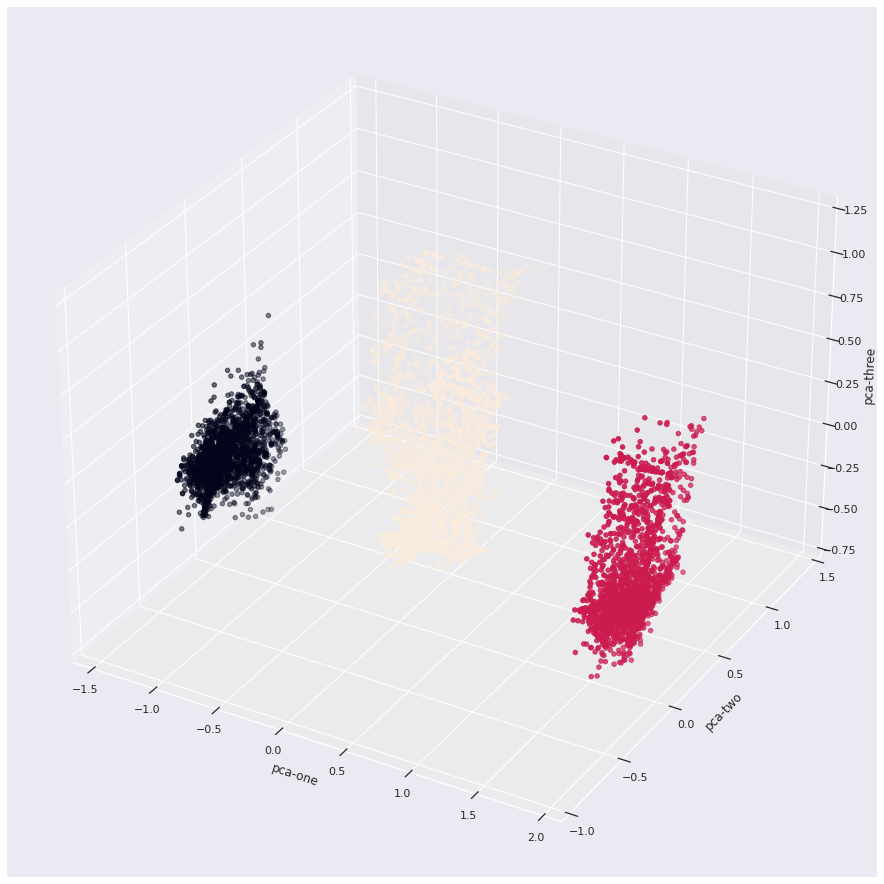

In [126]:
# #do EDA and check if the 7 clusters are ok

# #PCA
# #df2 
# #according to the previous data we chose k=7

from sklearn.decomposition import PCA

pca2 = PCA(n_components=3)
pca_features = pca2.fit_transform(df2)
x = pca_features[:,0]
y = pca_features[:,1]
z = pca_features[:,2]

k=3
kmeans = KMeans(n_clusters=k, random_state=42)

cl_labels = kmeans.fit_predict(df2)
df_pca_features = pd.DataFrame({'cluster_id': cl_labels, 
                                'pc_1':x, 
                                'pc_2':y, 'pc_3':z})

# sns.set(rc = {'figure.figsize':(15,8)})
# ax = sns.scatterplot(x='pc_1', y='pc_2', z='pc_3',
#                 hue='cluster_id', 
#                 size='cluster_id', 
#                 data=df_pca_features, 
#                 palette='tab20', 
#                 legend='full', projection='3d')
# ax.set_xlabel('PCA Feature 1')
# ax.set_ylabel('PCA Feature 2')
# ax.set_zlabel('PCA Feature 3')
# ax.set_title('PCA results of KMeans with ' + str(k) + ' clusters')
# ax.legend(bbox_to_anchor=(1.04,1.02), loc='upper left', fontsize='large');

ax = plt.figure(figsize=(26, 16)).gca(projection='3d')
ax.scatter(x, y, z, c='cluster_id', data=df_pca_features)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [29]:
#the PCA graph of each model and check
#sill scoring
#look at it from business perspective
 


# EDA

In [30]:
model = KMeans(n_clusters=4, random_state=42, verbose=0)
labels = model.fit_predict(df2)
df2["labels"] = labels

In [31]:
visual_df = df2.copy()
visual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance_frequency_update          8500 non-null   float64
 1   full_purchases_frequency          8500 non-null   float64
 2   purchases_installments_frequency  8500 non-null   float64
 3   cash_advance_frequency            8500 non-null   float64
 4   full_payment_prc                  8500 non-null   float64
 5   balance_account                   8500 non-null   float64
 6   paid_advance                      8500 non-null   float64
 7   full_purchases                    8500 non-null   float64
 8   installments                      8500 non-null   float64
 9   nr_cash_advances                  8500 non-null   float64
 10  nr_purchases                      8500 non-null   float64
 11  fixed_rate_period                 8500 non-null   float64
 12  paymen

In [32]:
visual_df['labels'].describe()

count    8500.000000
mean        1.713647
std         1.274300
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: labels, dtype: float64

In [33]:
visual_df.corr()['labels']

balance_frequency_update            0.236396
full_purchases_frequency            0.082157
purchases_installments_frequency   -0.738307
cash_advance_frequency              0.353962
full_payment_prc                   -0.297302
balance_account                     0.252838
paid_advance                        0.224465
full_purchases                      0.038260
installments                       -0.310478
nr_cash_advances                    0.248455
nr_purchases                       -0.238871
fixed_rate_period                   0.008704
payments                            0.032204
min_payments                        0.034582
labels                              1.000000
Name: labels, dtype: float64

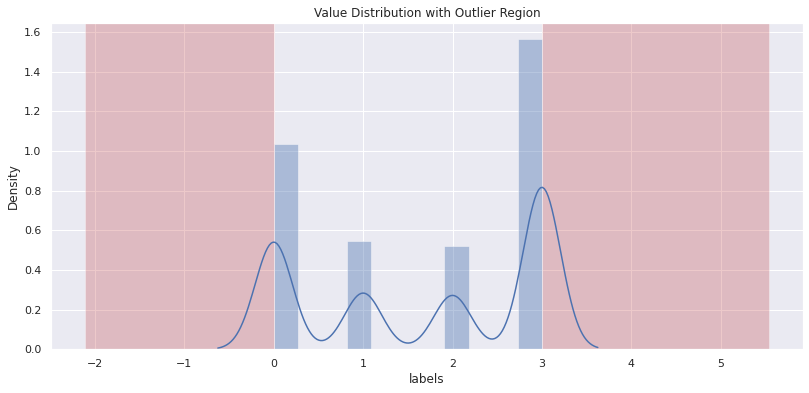

In [34]:
mean_value = visual_df['labels'].mean()
sigma_value = visual_df['labels'].std()
sigma3 = 3 * sigma_value

upper_lim = mean_value + sigma3
lower_lim = mean_value - sigma3

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.distplot(visual_df['labels'])
plt.axvspan(upper_lim, visual_df['labels'].max(), facecolor='r', alpha=0.3)
plt.axvspan(lower_lim, visual_df['labels'].min(), facecolor='r', alpha=0.3)
plt.title("Value Distribution with Outlier Region");

In [35]:
visual_df.columns

Index(['balance_frequency_update', 'full_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'full_payment_prc', 'balance_account', 'paid_advance', 'full_purchases',
       'installments', 'nr_cash_advances', 'nr_purchases', 'fixed_rate_period',
       'payments', 'min_payments', 'labels'],
      dtype='object')

In [36]:
# x = visual_df[['balance_frequency_update', 'full_purchases_frequency',
#        'purchases_installments_frequency', 'cash_advance_frequency',
#        'full_payment_prc', 'balance_account', 'paid_advance', 'full_purchases',
#        'installments', 'nr_cash_advances', 'nr_purchases', 'fixed_rate_period',
#        'payments', 'min_payments']]
# y = visual_df['labels']

# mean_value = x.mean()
# sigma_value = x.std()
# sigma3 = 3 * sigma_value

# upper_lim = mean_value + sigma3
# lower_lim = mean_value - sigma3

# fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# sns.distplot(x)
# plt.axvspan(upper_lim, x.max(), facecolor='r', alpha=0.3)
# plt.axvspan(lower_lim, x.min(), facecolor='r', alpha=0.3)
# plt.title("Value Distribution with Outlier Region");

In [37]:
df_train, df_test = train_test_split(visual_df, test_size=0.3, random_state=42)

x_train = df_train.drop(['labels'], axis=1)
y_train = df_train.labels

x_test = df_test.drop(['labels'], axis=1)
y_test = df_test.labels

clf=RandomForestClassifier(random_state=42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

model_evaluation('Full Train Data', y_pred)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       675
           1       0.99      0.94      0.96       375
           2       0.97      0.95      0.96       399
           3       0.98      0.99      0.98      1101

    accuracy                           0.97      2550
   macro avg       0.97      0.97      0.97      2550
weighted avg       0.97      0.97      0.97      2550

----------------------------------------------------------
Accuracy: 97.45%
----------------------------------------------------------


In [38]:
from sklearn.neighbors import LocalOutlierFactor

LOF = LocalOutlierFactor(contamination=0.05) # assuming 1% data might be outliers

inlier_lof = LOF.fit_predict(df_train)
datapoints = len(inlier_lof)
innerliers = (inlier_lof == 1).sum()
outliers = (inlier_lof == -1).sum()

print('Number of outliers: ', outliers)

Number of outliers:  298


In [39]:
df_train['outliers'] = inlier_lof
print(df_train.shape)
df_train.head()

(5950, 16)


,balance_frequency_update,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,full_payment_prc,balance_account,paid_advance,full_purchases,installments,nr_cash_advances,nr_purchases,fixed_rate_period,payments,min_payments,labels,outliers
6542,1.000000,0.166667,0.000000,0.000000,0.083333,0.242040,0.000000,0.008219,0.000000,0.00000,0.005587,1.000000,0.125087,0.023365,3,1
4392,0.454545,0.000000,0.416667,0.000000,0.333333,0.000456,0.000000,0.000000,0.002476,0.00000,0.013966,1.000000,0.003073,0.001830,1,1
926,0.571429,0.000000,0.714286,0.000000,0.000000,0.003583,0.000000,0.000000,0.017267,0.00000,0.013966,0.166667,0.005982,0.001069,0,1
7602,0.727273,0.500000,0.250000,0.000000,0.000000,0.013844,0.000000,0.026022,0.012889,0.00000,0.047486,1.000000,0.016517,0.002568,3,1
2470,1.000000,0.000000,0.000000,0.166667,0.000000,0.028143,0.011943,0.000000,0.000000,0.01626,0.000000,1.000000,0.011808,0.004005,3,1


In [40]:
df_train.tail()

,balance_frequency_update,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,full_payment_prc,balance_account,paid_advance,full_purchases,installments,nr_cash_advances,nr_purchases,fixed_rate_period,payments,min_payments,labels,outliers
5734,1.000000,0.500000,0.416667,0.000000,0.0,0.096231,0.000000,0.026402,0.010473,0.000000,0.083799,1.0,0.007575,0.008543,2,1
5191,1.000000,0.250000,0.000000,0.166667,0.0,0.129307,0.009982,0.029619,0.000000,0.016260,0.013966,1.0,0.031728,0.033654,3,1
5390,1.000000,0.000000,0.000000,0.333333,0.0,0.064015,0.019684,0.000000,0.000000,0.121951,0.000000,1.0,0.005114,0.003972,3,1
860,0.909091,0.000000,1.000000,0.000000,0.0,0.001889,0.000000,0.000000,0.009605,0.000000,0.033520,1.0,0.002959,0.001723,0,-1
7270,1.000000,0.083333,0.250000,0.083333,0.0,0.148472,0.003725,0.004784,0.021481,0.008130,0.025140,1.0,0.024117,0.025304,3,1


In [41]:
df_train.outliers.value_counts()

 1    5652
-1     298
Name: outliers, dtype: int64

In [42]:
df_train_noOutliers= df_train[df_train.outliers == 1]
x_train_noOutliers = df_train_noOutliers.drop(['labels', 'outliers'], axis=1)
y_train_noOutliers = df_train_noOutliers.labels

clf=RandomForestClassifier(random_state=42)
clf.fit(x_train_noOutliers,y_train_noOutliers)
y_pred=clf.predict(x_test)

model_evaluation('LOF', y_pred)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       675
           1       0.98      0.95      0.97       375
           2       0.97      0.94      0.96       399
           3       0.98      0.99      0.98      1101

    accuracy                           0.97      2550
   macro avg       0.98      0.97      0.97      2550
weighted avg       0.97      0.97      0.97      2550

----------------------------------------------------------
Accuracy: 97.49%
----------------------------------------------------------


<AxesSubplot:xlabel='full_purchases_frequency', ylabel='payments'>

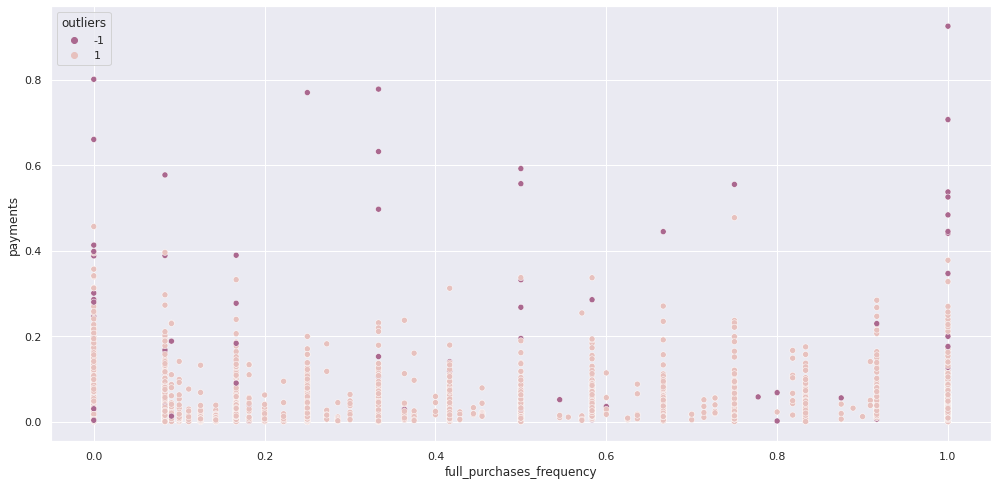

In [43]:
plt.figure(figsize=(15,8))
cmap = sns.cubehelix_palette(dark=.8, light=.5, as_cmap=True)
sns.scatterplot(x="full_purchases_frequency", y="payments", data=df_train,  hue="outliers", palette=cmap)

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=42)


x = visual_df.drop("labels", axis=1).copy()
y = visual_df["labels"].copy()

gbm.fit(x, y)
y_pred = gbm.predict(x)
class_labels = gbm.classes_
print(classification_report(y, y_pred))

pd.DataFrame(confusion_matrix(y, y_pred), columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2402
           1       1.00      1.00      1.00      1260
           2       1.00      1.00      1.00      1208
           3       1.00      1.00      1.00      3630

    accuracy                           1.00      8500
   macro avg       1.00      1.00      1.00      8500
weighted avg       1.00      1.00      1.00      8500



,0,1,2,3
0,2402,0,0,0
1,1,1257,0,2
2,2,0,1205,1
3,1,1,1,3627


In [45]:
feat_imp = gbm.feature_importances_  # get feature importances from the model
features = x.columns

In [171]:
feature_importance = pd.DataFrame(
    list(zip(features, feat_imp)), columns=["Feature", "Importance"]
)
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.sort_values("Importance", ascending=False)

,Feature,Importance
2,purchases_installments_frequency,0.376457
1,full_purchases_frequency,0.303212
0,balance_frequency_update,0.278013
5,balance_account,0.011987
4,full_payment_prc,0.009805
8,installments,0.008457
3,cash_advance_frequency,0.006005
9,nr_cash_advances,0.001791
10,nr_purchases,0.001755
6,paid_advance,0.000825


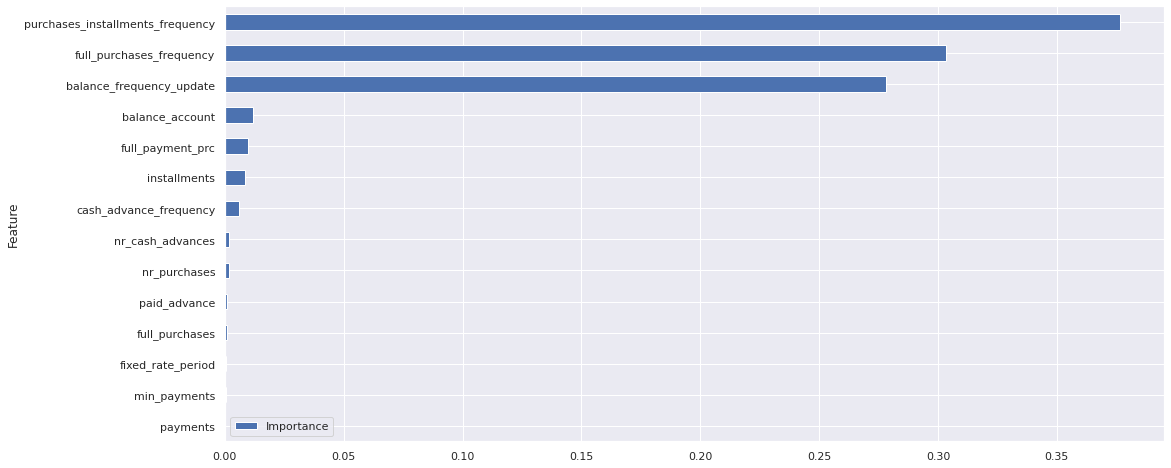

In [172]:
ax = feature_importance.plot.barh(x='Feature', y='Importance')
ax.invert_yaxis()

raw
outliers on raw
picking the top 3 features

In [48]:
path = "../data/card_transactions.csv"
df_3 = pd.read_csv(path, na_values=["?", ""])
df_3.set_index("customer_id", inplace=True)
df_3top = df_3[['balance_frequency_update', 'full_purchases_frequency', 'purchases_installments_frequency']]
df_3top.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8500 entries, tGEg8fT2eCgVxdwS to QIwf3M4Yn4EHwAyv
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance_frequency_update          8500 non-null   float64
 1   full_purchases_frequency          8500 non-null   float64
 2   purchases_installments_frequency  8500 non-null   float64
dtypes: float64(3)
memory usage: 265.6+ KB


In [49]:
df_3top.corr()

,balance_frequency_update,full_purchases_frequency,purchases_installments_frequency
balance_frequency_update,1.000000,0.203585,0.177112
full_purchases_frequency,0.203585,1.000000,0.144529
purchases_installments_frequency,0.177112,0.144529,1.000000


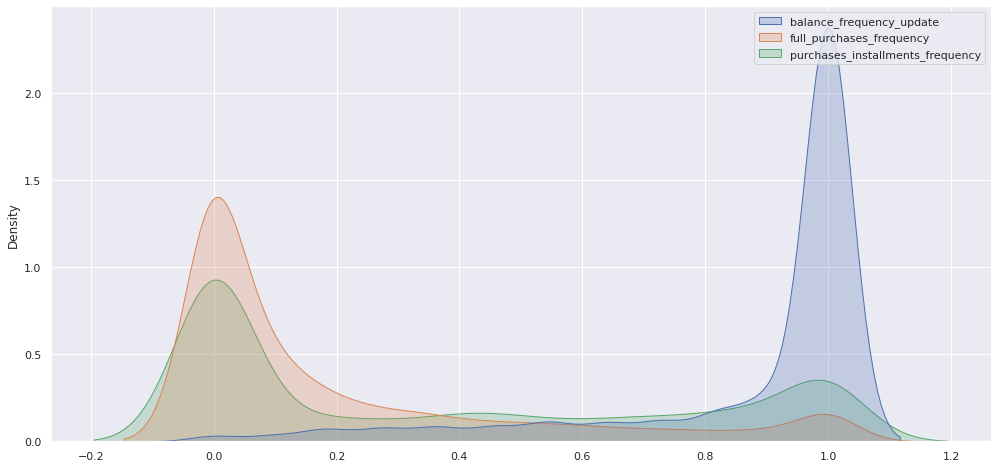

In [50]:
sns.kdeplot(data=df_3top, shade=True);

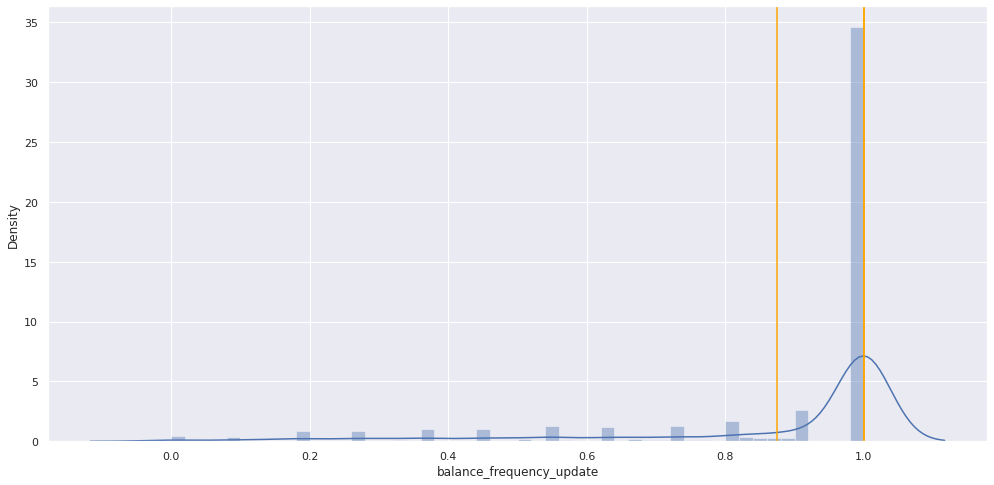

In [161]:
fig, ax2 = plt.subplots()
quartiles = [25, 50, 75]
ax2 = sns.distplot(df_3top['balance_frequency_update'])
for q in np.percentile(df_3top['balance_frequency_update'], quartiles):
    plt.axvline(q, color='orange')
plt.show()

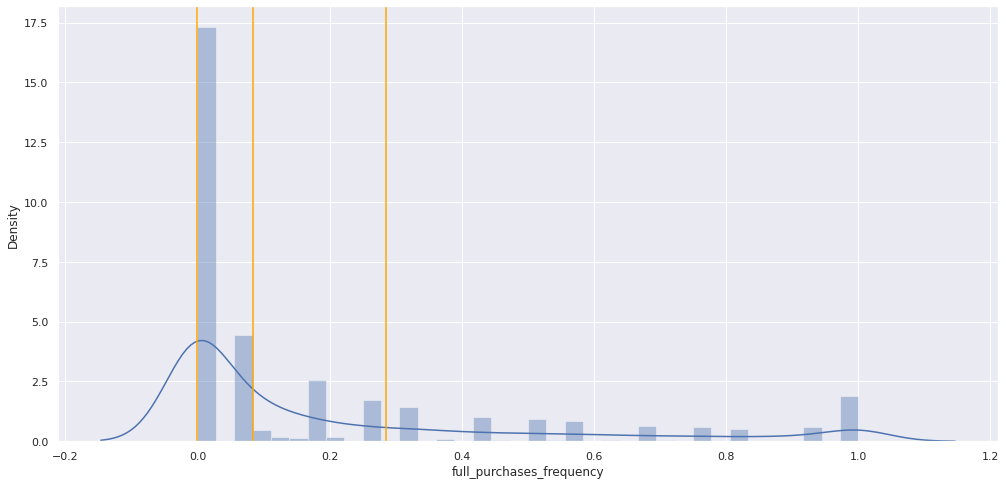

In [162]:
fig, ax2 = plt.subplots()
     
quartiles = [25, 50, 75]
ax2 = sns.distplot(df_3top['full_purchases_frequency'])
for q in np.percentile(df_3top['full_purchases_frequency'], quartiles):
    plt.axvline(q, color='orange')
plt.show()

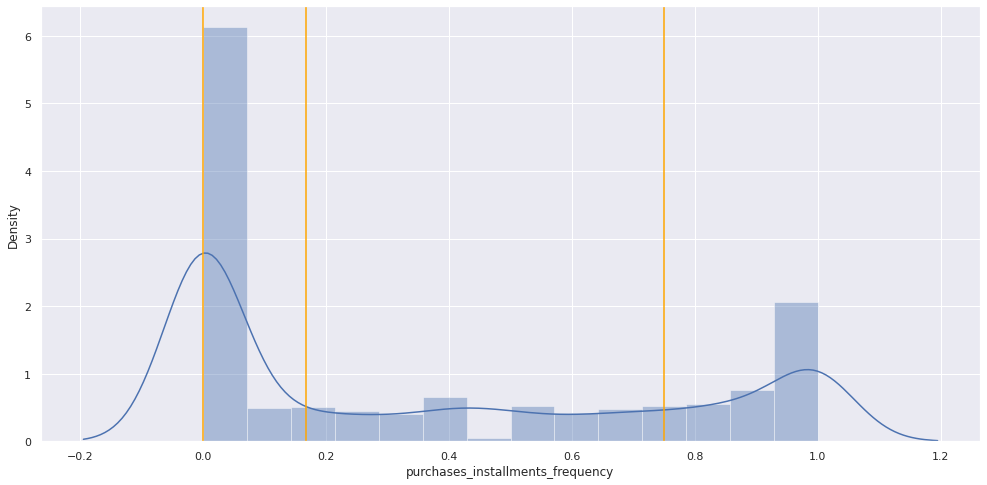

In [163]:
fig, ax2 = plt.subplots()
       
quartiles = [25, 50, 75]
ax2 = sns.distplot(df_3top['purchases_installments_frequency'])
for q in np.percentile(df_3top['purchases_installments_frequency'], quartiles):
    plt.axvline(q, color='orange')
plt.show()

In [51]:
#ouliers in full purchases frequency
#using the 3 sigma model

mean_value = df_3top['full_purchases_frequency'].mean()
sigma_value = df_3top['full_purchases_frequency'].std()
sigma3 = 3 * sigma_value

upper_lim = mean_value + sigma3
lower_lim = mean_value - sigma3

print(upper_lim, lower_lim)


1.0952078477367992 -0.6913283133838539


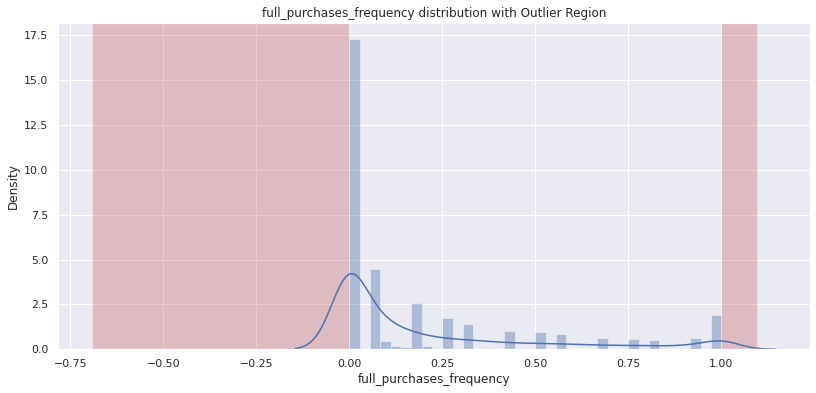

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.distplot(df_3top['full_purchases_frequency'])
plt.axvspan(upper_lim, df_3top['full_purchases_frequency'].max(), facecolor='r', alpha=0.3)
plt.axvspan(lower_lim, df_3top['full_purchases_frequency'].min(), facecolor='r', alpha=0.3)
plt.title("full_purchases_frequency distribution with Outlier Region");

In [53]:
temp_outliers = df_3top['full_purchases_frequency'][(df_3top['full_purchases_frequency'] > upper_lim) | (df_3top['full_purchases_frequency'] < lower_lim)]
print('Number of outliers: ', len(temp_outliers))

Number of outliers:  0


In [54]:
q3, q1 = np.percentile(df_3top['full_purchases_frequency'], [75 ,25])
iqr = q3 - q1
lw = q1-(1.5 * iqr)
uw = q3+(1.5 * iqr)
print(lw, uw)
print(iqr)

-0.42857099999999987 0.7142849999999998
0.2857139999999999


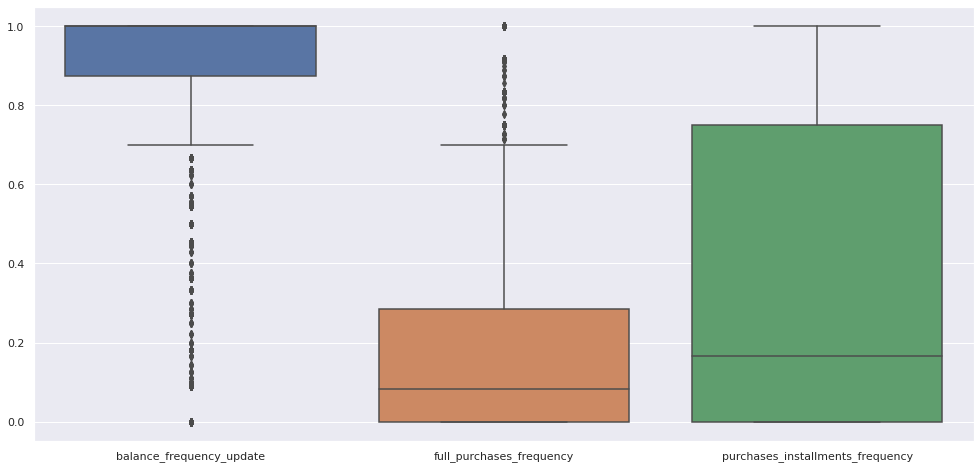

In [55]:
sns.boxplot(data=df_3top);

In [56]:
temp_outliers2 = df_3top['full_purchases_frequency'][(df_3top['full_purchases_frequency'] > uw) | (df_3top['full_purchases_frequency'] < lw)]
print('Number of outliers: ', len(temp_outliers2))

Number of outliers:  890


In [57]:
temp_outliers_sorted2 = temp_outliers2.sort_values(ascending=False).reset_index()
#pred_anom_box = (x.loc[temp_outliers_sorted2.index.tolist()])

temp_outliers_sorted2.head()
#customers that we should approch?

,customer_id,full_purchases_frequency
0,0N0eBl8ySaZThxKE,1.0
1,ydLrgLkeD3fGE6Pm,1.0
2,l0I03glk1qi8xuXY,1.0
3,IBay6QyYXWFlSl7L,1.0
4,rQBMZ3mBiL86TH0j,1.0


# More evaluations

In [80]:
#df_3.drop('credit_limit', axis=1, inplace=True)

In [81]:
dfm = df_3.copy()

In [82]:
dfm.fillna(df.median(), inplace=True)

from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(dfm)

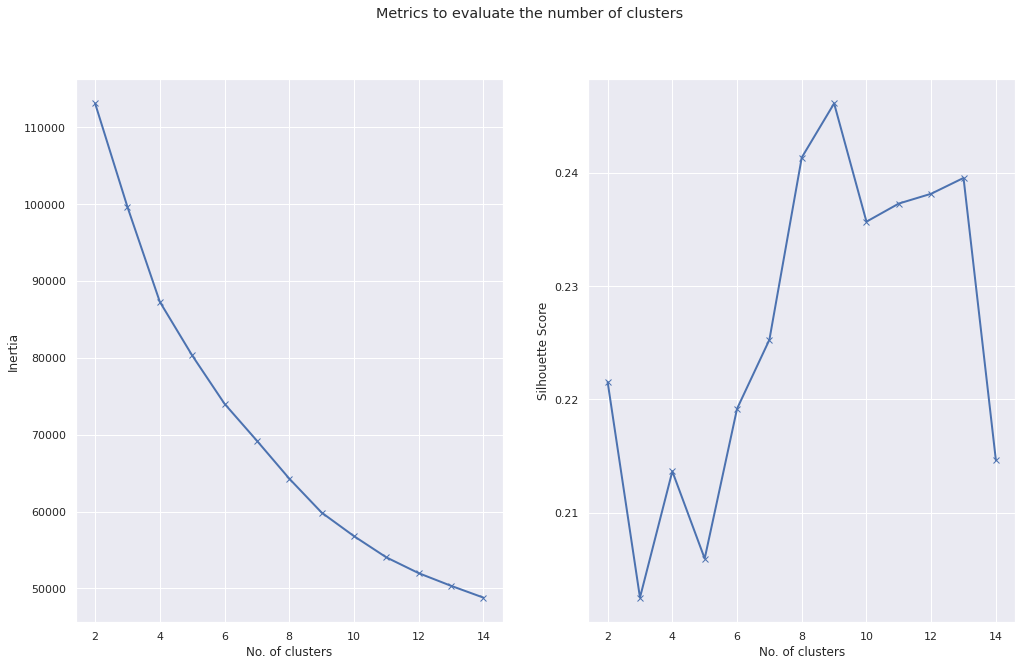

In [83]:
from sklearn.metrics import silhouette_score

def evaluate_metrics(df, min_clust=2, max_clust=10, rand_state=1):
    inertias = []
    silhouette = []
    for n_clust in range(min_clust, max_clust):
        kmeans = KMeans(n_clusters=n_clust, random_state=rand_state)
        y_label = kmeans.fit_predict(df)
        inertias.append(kmeans.inertia_)
        silhouette.append(silhouette_score(df, y_label))       

    fig, ax = plt.subplots(1, 2, figsize=(15, 10))
    ax[0].plot(range(min_clust, max_clust), inertias, '-x', linewidth=2)
    ax[0].set_xlabel('No. of clusters')
    ax[0].set_ylabel('Inertia')
    
    ax[1].plot(range(min_clust, max_clust), silhouette, '-x', linewidth=2)
    ax[1].set_xlabel('No. of clusters')
    ax[1].set_ylabel('Silhouette Score')
    
    fig.suptitle('Metrics to evaluate the number of clusters')
    plt.show()

evaluate_metrics(df_scaled, min_clust=2, max_clust=15, rand_state=42)

In [84]:
# try:
#     # See #1137: this allows compatibility for scikit-learn >= 0.24
#     from sklearn.utils import safe_indexing
# except ImportError:
#     from sklearn.utils import _safe_indexing
# from yellowbrick.cluster.silhouette import SilhouetteVisualizer

# plt.style.use('seaborn-paper')
# fig, axs = plt.subplots(2, 3, figsize=(20, 15))
# axs = axs.reshape(6)
# for i, k in enumerate(range(7, 13)):
#     ax = axs[i]
#     sil = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=42), ax=ax)
#     sil.fit(df_scaled)
#     sil.finalize()

In [85]:
dfm.T

customer_id,tGEg8fT2eCgVxdwS,stEDu20sSKOXomjg,CEB2blrN3b88GsRe,0N0eBl8ySaZThxKE,6NLauoHUwtwOv4Wy,3Zx75mmL4wXFf36M,VIncqsQDzbMSsvL9,fDoLh1FTtFMuu3xs,OpclyuJ9WGTLImw1,k2GbzBNCo0TQmwaw,...,qiNQQyNu3YM9PRwP,tN3pEIcj04loWHyP,By5N2Lqz6aZkh22M,s2H9hSAyGhSsC8Cp,UCyeExThOQm4BVuM,zdVfd3CYHYBjf61b,JGghMowcxhfbVGKm,5GrEtC6ncxuLpnXZ,Ox7ETtYHjE2uo4Xo,QIwf3M4Yn4EHwAyv
balance_account,9.298409,52.666422,1360.795674,2021.641161,22.322374,9266.080540,97.389327,4788.283283,319.037744,1641.251218,...,0.000000,1748.310383,1514.885982,3.786310,2707.058356,1127.607606,21.409828,0.000000,1646.384530,1861.087370
purchases_amount,107.600000,150.300000,0.000000,363.180000,95.000000,100.000000,60.000000,0.000000,1262.280000,0.000000,...,232.200000,0.000000,928.060000,133.050000,2018.130000,0.000000,149.710000,0.000000,1047.340000,1752.060000
paid_advance,0.000000,0.000000,462.861443,0.000000,1162.045833,4383.296268,0.000000,437.808586,0.000000,2990.165538,...,0.000000,157.152652,0.000000,0.000000,0.000000,271.093275,0.000000,253.887233,146.650389,0.000000
full_purchases,0.000000,0.000000,0.000000,363.180000,95.000000,0.000000,60.000000,0.000000,1262.280000,0.000000,...,0.000000,0.000000,834.300000,28.200000,1545.230000,0.000000,0.000000,0.000000,1047.340000,1417.180000
balance_frequency_update,0.909091,1.000000,1.000000,1.000000,0.363636,1.000000,1.000000,1.000000,0.818182,0.727273,...,0.000000,1.000000,0.909091,0.636364,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
installments,107.600000,150.300000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,...,232.200000,0.000000,93.760000,104.850000,472.900000,0.000000,149.710000,0.000000,0.000000,334.880000
purchases_frequency,0.909091,1.000000,0.000000,1.000000,0.083333,0.333333,0.083333,0.000000,0.250000,0.000000,...,1.000000,0.000000,0.909091,0.416667,0.750000,0.000000,0.916667,0.000000,0.583333,0.916667
full_purchases_frequency,0.000000,0.000000,0.000000,1.000000,0.083333,0.000000,0.083333,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.727273,0.166667,0.250000,0.000000,0.000000,0.000000,0.583333,0.583333
purchases_installments_frequency,0.818182,0.833333,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.818182,0.250000,0.666667,0.000000,0.916667,0.000000,0.000000,0.666667
cash_advance_frequency,0.000000,0.000000,0.272727,0.000000,0.166667,0.166667,0.000000,0.166667,0.000000,0.166667,...,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000,0.111111,0.166667,0.000000


In [86]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=7, random_state=42)
dfm['k_7_label'] = kmeans.fit_predict(dfm)
round(1e2 * dfm['k_7_label'].value_counts().sort_index()/len(dfm), 2)

0    20.05
1     1.14
2     7.99
3    46.33
4    19.85
5     1.00
6     3.65
Name: k_7_label, dtype: float64

In [87]:
round(dfm.groupby('k_7_label').mean().T, 2)

k_7_label,0,1,2,3,4,5,6
balance_account,937.42,4040.88,6444.85,418.92,2256.13,4493.11,3572.26
purchases_amount,2328.18,14840.00,1142.86,339.51,301.80,1354.75,1136.41
paid_advance,261.76,868.74,3226.62,171.56,1597.28,1326.16,6679.76
full_purchases,1414.83,10638.16,701.26,142.44,164.57,289.86,700.88
balance_frequency_update,0.91,0.98,0.99,0.80,0.96,0.99,0.89
installments,913.73,4201.84,441.70,197.50,137.37,1064.89,435.60
purchases_frequency,0.78,0.91,0.43,0.46,0.28,0.52,0.37
full_purchases_frequency,0.46,0.78,0.24,0.11,0.11,0.07,0.19
purchases_installments_frequency,0.57,0.72,0.31,0.35,0.19,0.48,0.27
cash_advance_frequency,0.05,0.07,0.35,0.06,0.26,0.13,0.41


In [88]:
dfm.mean()

balance_account                     1565.941403
purchases_amount                     999.561312
paid_advance                         973.508540
full_purchases                       588.165365
balance_frequency_update               0.876272
installments                         411.708492
purchases_frequency                    0.489383
full_purchases_frequency               0.201940
purchases_installments_frequency       0.363796
cash_advance_frequency                 0.135288
nr_cash_advances                       3.253647
nr_purchases                          14.677059
fixed_rate_period                     11.516118
payments                            1721.250989
min_payments                         835.248089
full_payment_prc                       0.152587
k_7_label                              2.623765
dtype: float64

In [89]:
dfm.columns

Index(['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'nr_cash_advances', 'nr_purchases',
       'fixed_rate_period', 'payments', 'min_payments', 'full_payment_prc',
       'k_7_label'],
      dtype='object')

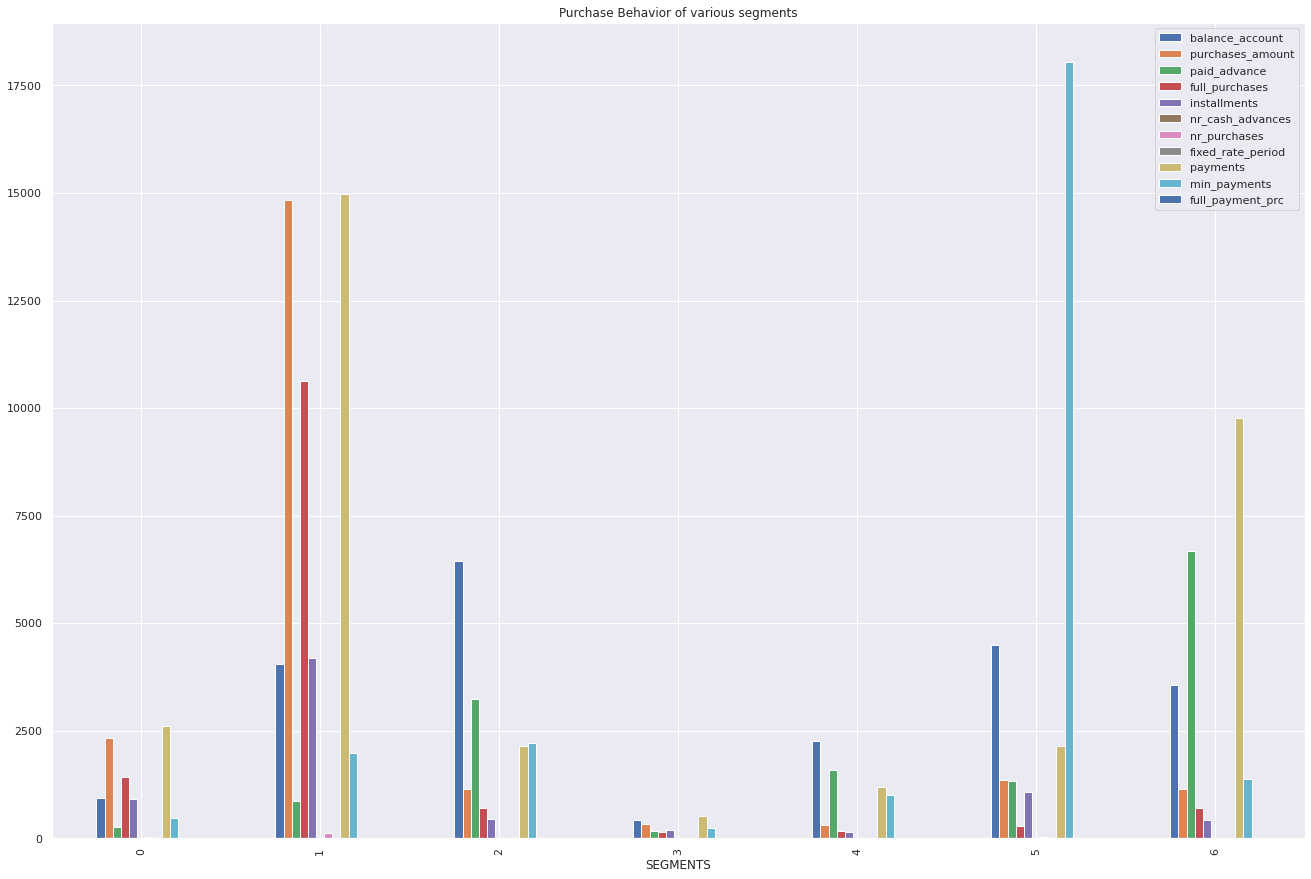

In [91]:
(dfm[['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases', 'credit_limit',
       'installments', 'nr_cash_advances', 'nr_purchases',
        'fixed_rate_period', 'payments', 'min_payments',
       'full_payment_prc', 'k_7_label']]
 .groupby('k_7_label').mean().plot.bar(figsize=(20, 15)))
plt.title('Purchase Behavior of various segments')
plt.xlabel('SEGMENTS');

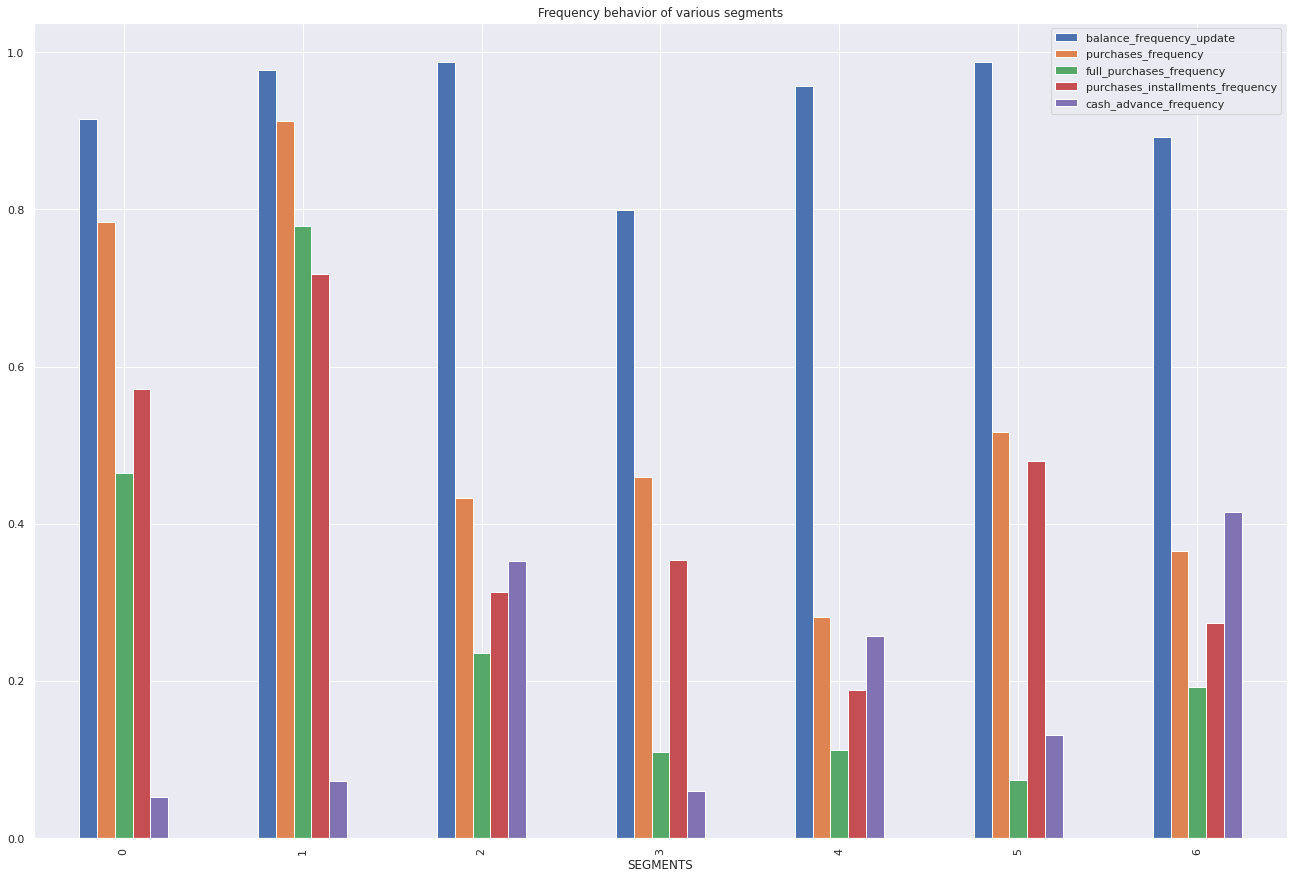

In [92]:
(dfm[['balance_frequency_update','purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'k_7_label']]
 .groupby('k_7_label').mean().plot.bar(figsize=(20, 15)))
plt.title('Frequency behavior of various segments')
plt.xlabel('SEGMENTS');

In [93]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
dfm['k_3_label'] = kmeans.fit_predict(dfm)
round(1e2 * dfm['k_3_label'].value_counts().sort_index()/len(dfm), 2)

0    11.24
1    87.59
2     1.18
Name: k_3_label, dtype: float64

In [94]:
round(dfm.groupby('k_3_label').mean().T, 2)

k_3_label,0,1,2
balance_account,4913.38,1114.68,3194.61
purchases_amount,3412.10,691.99,858.61
paid_advance,3929.84,596.15,834.83
full_purchases,2300.51,374.58,136.94
balance_frequency_update,0.95,0.86,0.98
installments,1112.31,317.68,721.67
purchases_frequency,0.56,0.48,0.46
full_purchases_frequency,0.36,0.18,0.04
purchases_installments_frequency,0.43,0.35,0.43
cash_advance_frequency,0.30,0.11,0.10


In [95]:
dfm.head()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,fixed_rate_period,payments,min_payments,full_payment_prc,k_7_label,k_3_label
customer_id,,,,,,,,,,,,,,,,,,
tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,11,89.868853,89.711672,0.428571,3,1
stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,6,54.722514,82.955180,0.000000,3,1
CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,11,303.031979,443.781316,0.000000,3,1
0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,12,704.240770,795.859808,0.000000,4,1
6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,12,4094.261427,40.142262,0.000000,0,1


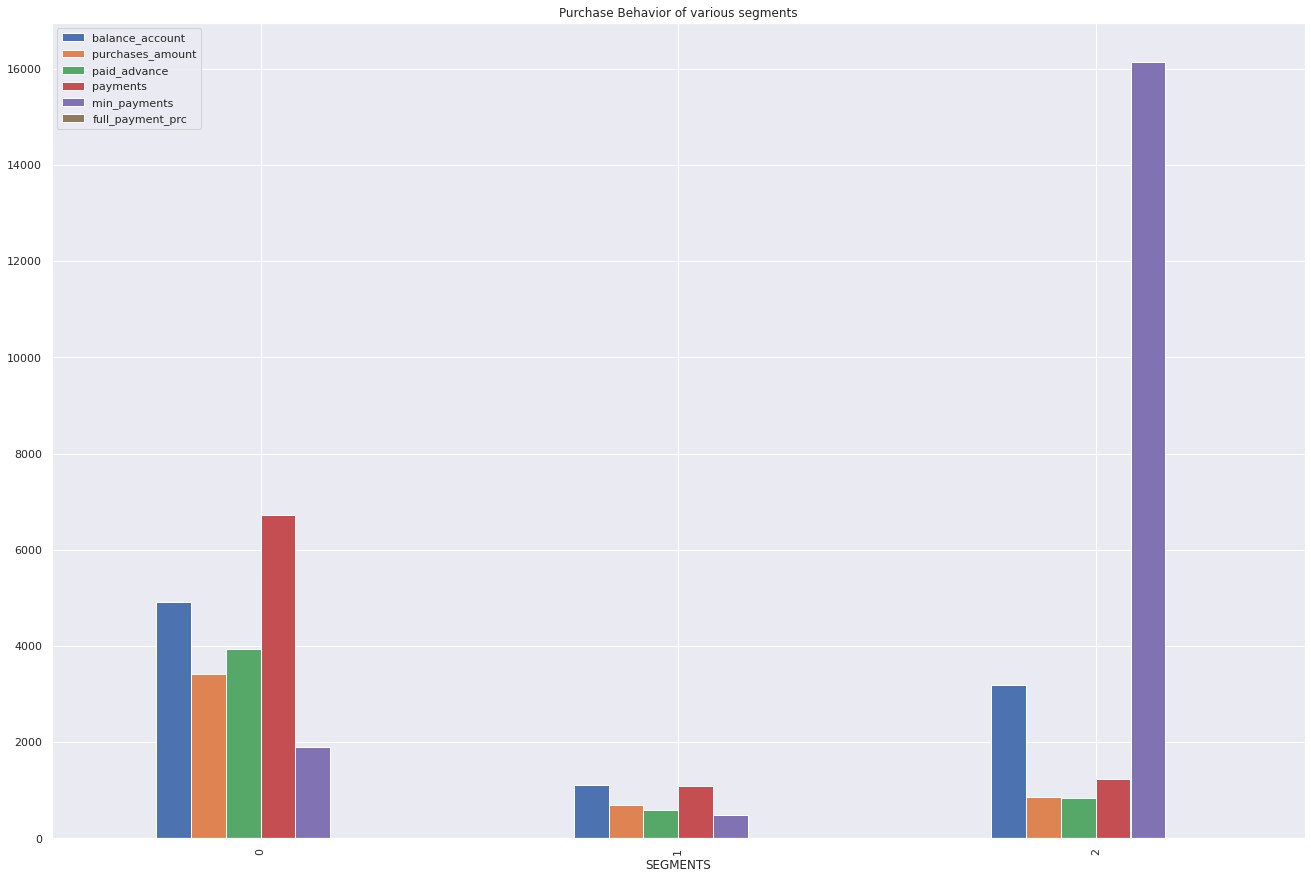

In [99]:
(dfm[['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases', 'credit_limit',
       'payments', 'min_payments',
       'full_payment_prc', 'k_3_label']].groupby('k_3_label').mean().plot.bar(figsize=(20, 15)))
plt.title('Purchase Behavior of various segments')
plt.xlabel('SEGMENTS');

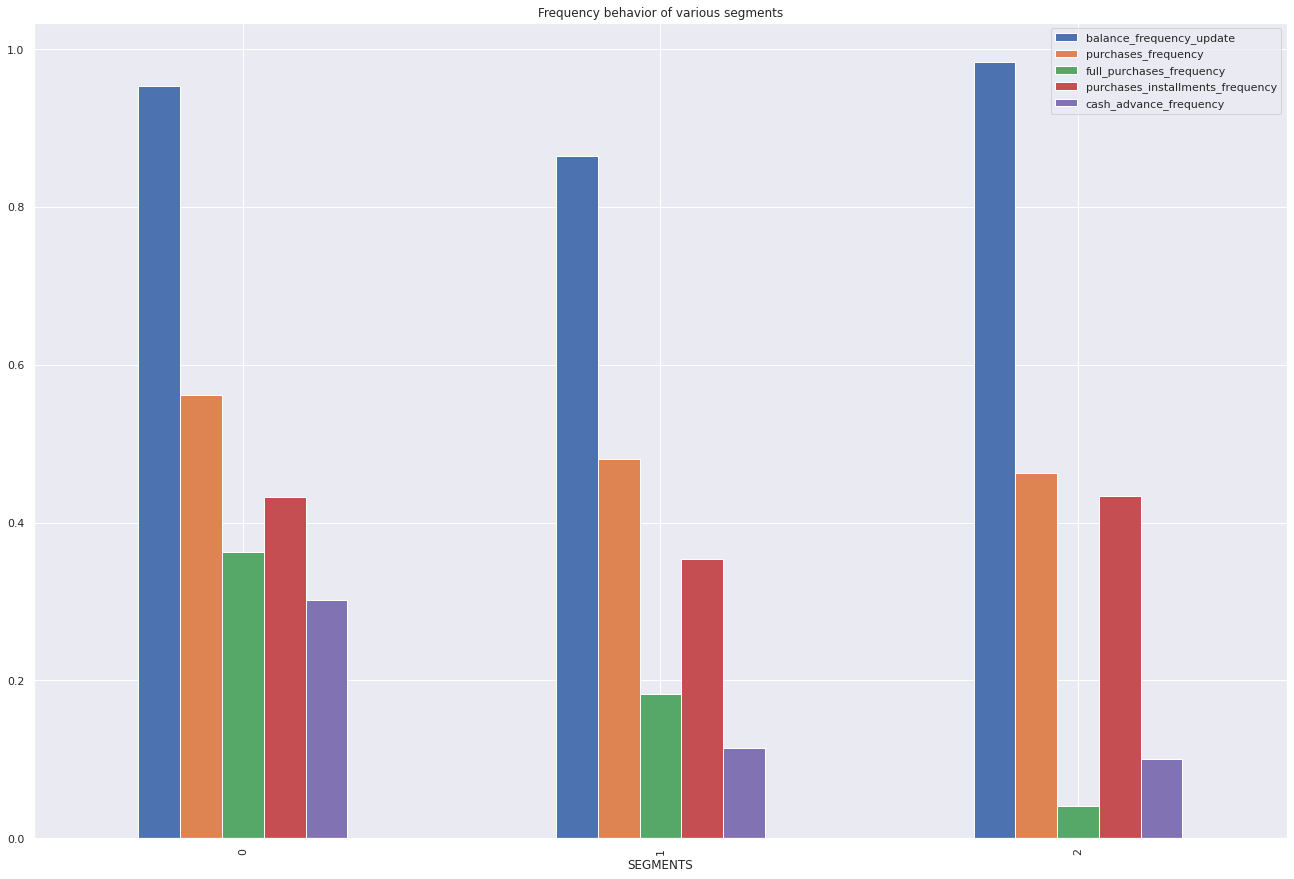

In [97]:
(dfm[['balance_frequency_update','purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'k_3_label']]
 .groupby('k_3_label').mean().plot.bar(figsize=(20, 15)))
plt.title('Frequency behavior of various segments')
plt.xlabel('SEGMENTS');

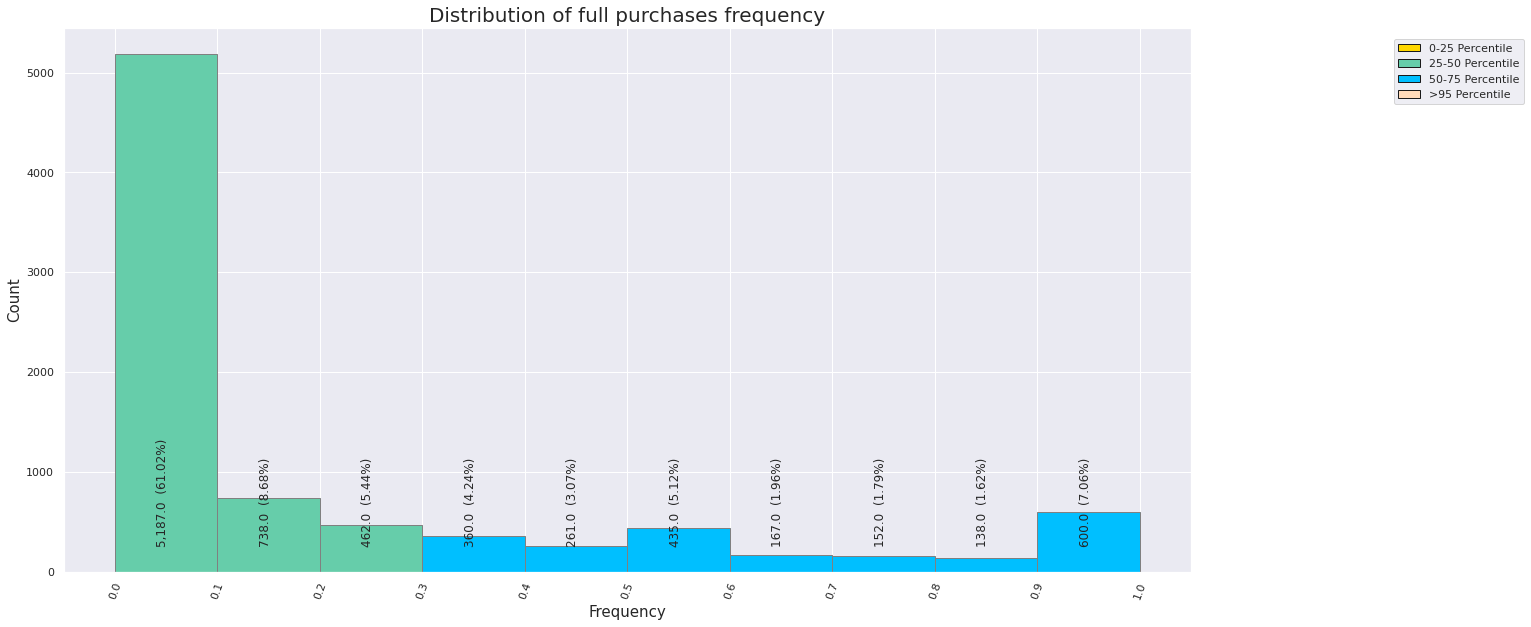

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

# Plot the Histogram from the random data
fig, ax = plt.subplots(figsize=(18,10))
counts, bins, patches = ax.hist(dfm['full_purchases_frequency'], facecolor=perc_50_colour, edgecolor='gray')

 #Set the ticks to be at the edges of the bins.
ax.set_xticks(bins.round(2))
plt.xticks(rotation=70)

# Set the graph title and axes titles
plt.title('Distribution of full purchases frequency', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Frequency', fontsize=15)

# Change the colors of bars at the edges
twentyfifth, seventyfifth, ninetyfifth = np.percentile(dfm['full_purchases_frequency'], [25, 75, 95])
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside < twentyfifth:
        patch.set_facecolor(perc_25_colour)
    elif leftside > ninetyfifth:
        patch.set_facecolor(perc_95_colour)
    elif leftside > seventyfifth:
        patch.set_facecolor(perc_75_colour)
        
# Calculate bar centre to display the count of data points and %
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
# use the 1st value in y axis to calculate the y point to display text
bin_y_centers = ax.get_yticks()[1] * 0.25  

# Display the count of data points and % for each bar in histogram
for i in range(len(bins)-1):
    bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90,rotation_mode='anchor')

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

# Display the graph
plt.show()

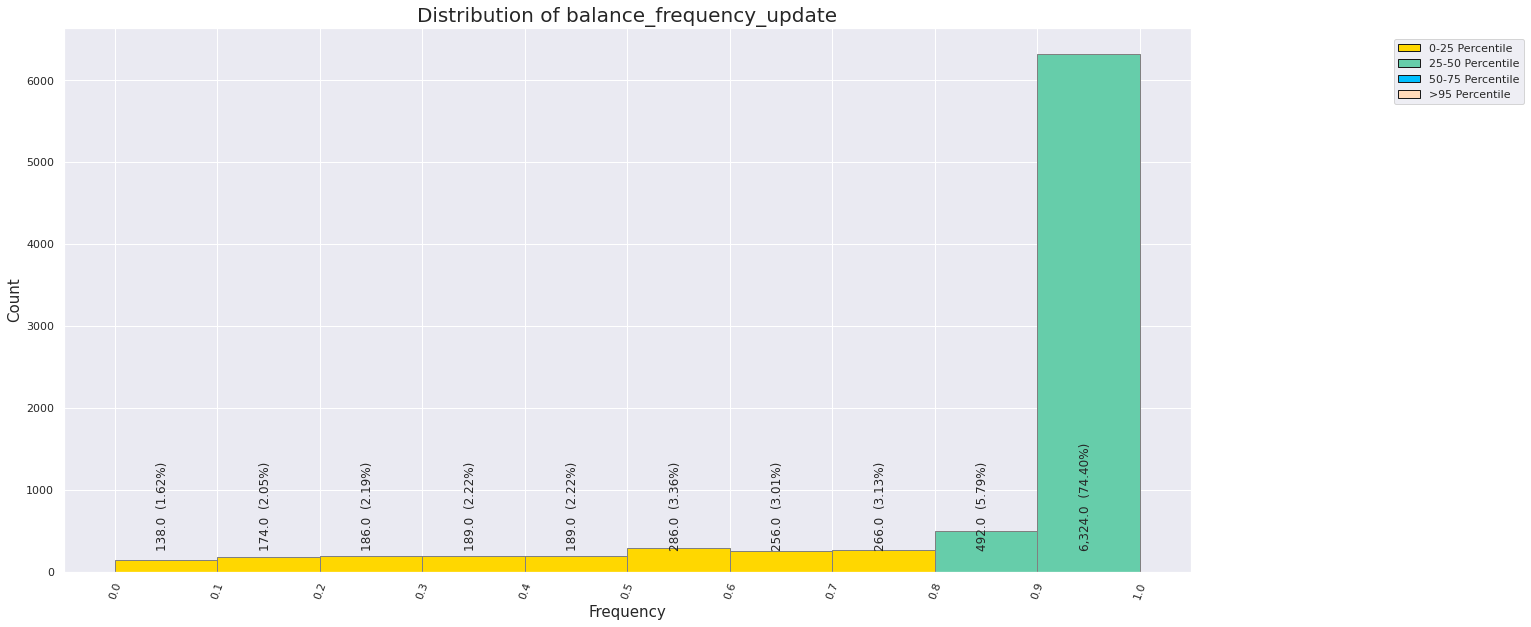

In [132]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

perc_25_colour = 'gold'
perc_50_colour = 'mediumaquamarine'
perc_75_colour = 'deepskyblue'
perc_95_colour = 'peachpuff'

# Plot the Histogram from the random data
fig, ax = plt.subplots(figsize=(18,10))
counts, bins, patches = ax.hist(dfm['balance_frequency_update'], facecolor=perc_50_colour, edgecolor='gray')

 #Set the ticks to be at the edges of the bins.
ax.set_xticks(bins.round(2))
plt.xticks(rotation=70)

# Set the graph title and axes titles
plt.title('Distribution of balance_frequency_update', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Frequency', fontsize=15)

# Change the colors of bars at the edges
twentyfifth, seventyfifth, ninetyfifth = np.percentile(dfm['balance_frequency_update'], [25, 75, 95])
for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
    if rightside < twentyfifth:
        patch.set_facecolor(perc_25_colour)
    elif leftside > ninetyfifth:
        patch.set_facecolor(perc_95_colour)
    elif leftside > seventyfifth:
        patch.set_facecolor(perc_75_colour)
        
# Calculate bar centre to display the count of data points and %
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
# use the 1st value in y axis to calculate the y point to display text
bin_y_centers = ax.get_yticks()[1] * 0.25  

# Display the count of data points and % for each bar in histogram
for i in range(len(bins)-1):
    bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90,rotation_mode='anchor')

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))

# Display the graph
plt.show()